In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the dataset
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [12]:
def build_alexnet(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        # First Convolutional Layer
        tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # Second Convolutional Layer
        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # Third Convolutional Layer
        tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'),

        # Fully Connected Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model


In [13]:
def compile_and_train(model, x_train, y_train, x_test, y_test, epochs=20, batch_size=32):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    _, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    return history


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to calculate performance metrics and loss
def evaluate_model(model, x_test, y_test):
    # Predict on test set
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    y_true = y_test.argmax(axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    # Print classification report
    print(classification_report(y_true, y_pred_classes))

    # Return metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Function to plot loss curves
def plot_loss_curves(history, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curves for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot performance metrics
def plot_metrics(metrics_dict, model_name):
    metrics_names = list(metrics_dict.keys())
    metrics_values = list(metrics_dict.values())

    plt.figure(figsize=(8, 5))
    plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'salmon', 'purple'])
    plt.title(f'Performance Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    for i, v in enumerate(metrics_values):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()



In [15]:
# Build and train the modified AlexNet
alexnet = build_alexnet()
history_alexnet = compile_and_train(alexnet, x_train, y_train, x_test, y_test, epochs=20)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9204 - loss: 0.2545 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9889 - loss: 0.0386 - val_accuracy: 0.9896 - val_loss: 0.0339
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0261 - val_accuracy: 0.9889 - val_loss: 0.0366
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9931 - loss: 0.0219 - val_accuracy: 0.9921 - val_loss: 0.0285
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9950 - loss: 0.0165 - val_accuracy: 0.9917 - val_loss: 0.0287
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9900 - val_loss: 0.0352
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9916 - val_loss: 0.0308
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0098 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

{'accuracy': 0.9922, 'precision': 0.9920080998735159, 'recall': 0.9921831228373508, 'f1_score': 0.992080165408775}


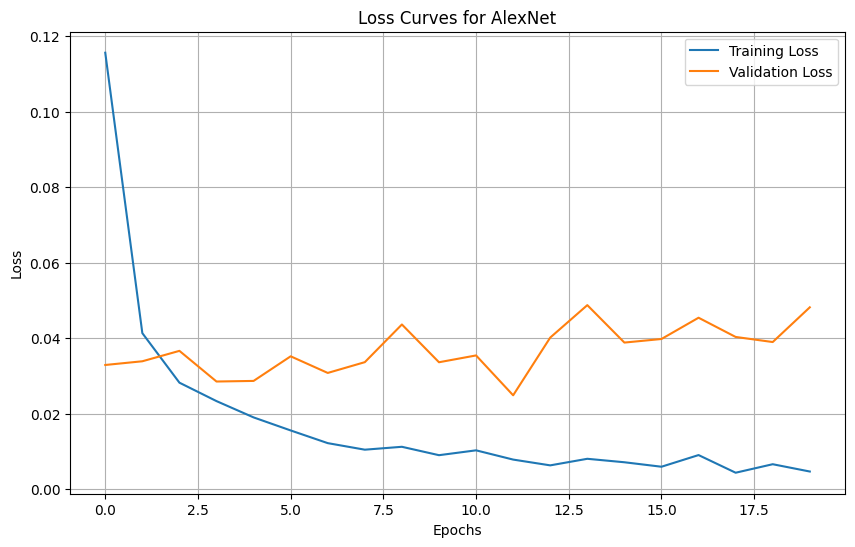

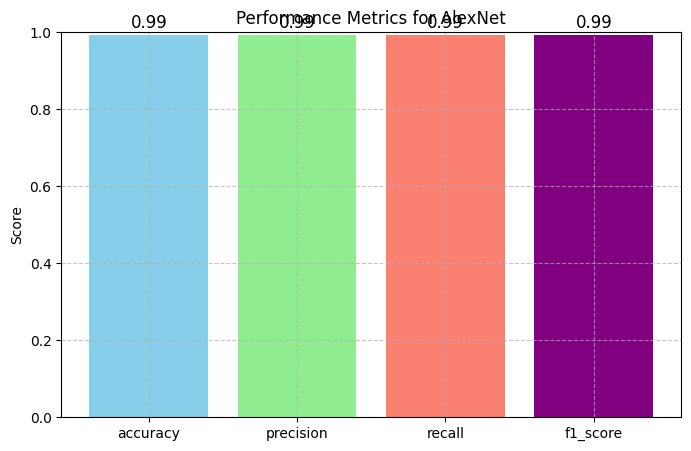

In [33]:
metrics_alexnet = evaluate_model(alexnet, x_test, y_test)
print(metrics_alexnet)
plot_loss_curves(history_alexnet, "AlexNet")
plot_metrics(metrics_alexnet, "AlexNet")

In [17]:
def inception_module(x, filters):
    # 1x1 convolution
    conv1x1 = tf.keras.layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 convolution
    conv3x3 = tf.keras.layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)

    # 5x5 convolution
    conv5x5 = tf.keras.layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)

    # Max pooling followed by 1x1 convolution
    pool = tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool = tf.keras.layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool)

    # Concatenate all branches
    return tf.keras.layers.concatenate([conv1x1, conv3x3, conv5x5, pool], axis=-1)


def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolution and pooling
    x = tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Inception modules
    x = inception_module(x, [16, 16, 16, 16])
    x = inception_module(x, [32, 32, 32, 32])

    # Global Average Pooling and fully connected layers
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model


In [18]:
# Build and train the modified GoogLeNet
googlenet = build_googlenet()
history_googlenet = compile_and_train(googlenet, x_train, y_train, x_test, y_test, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6946 - loss: 0.8742 - val_accuracy: 0.9548 - val_loss: 0.1550
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9547 - loss: 0.1485 - val_accuracy: 0.9701 - val_loss: 0.0939
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9688 - loss: 0.0982 - val_accuracy: 0.9749 - val_loss: 0.0777
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0732 - val_accuracy: 0.9787 - val_loss: 0.0695
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9820 - loss: 0.0576 - val_accuracy: 0.9850 - val_loss: 0.0448
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9841 - loss: 0.0501 - val_accuracy: 0.9903 - val_loss: 0.0315
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0.9891 - val_loss: 0.0350
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9899 - loss: 0.0338 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

{'accuracy': 0.9922, 'precision': 0.9922189093939704, 'recall': 0.9920707766279133, 'f1_score': 0.992120760281441}


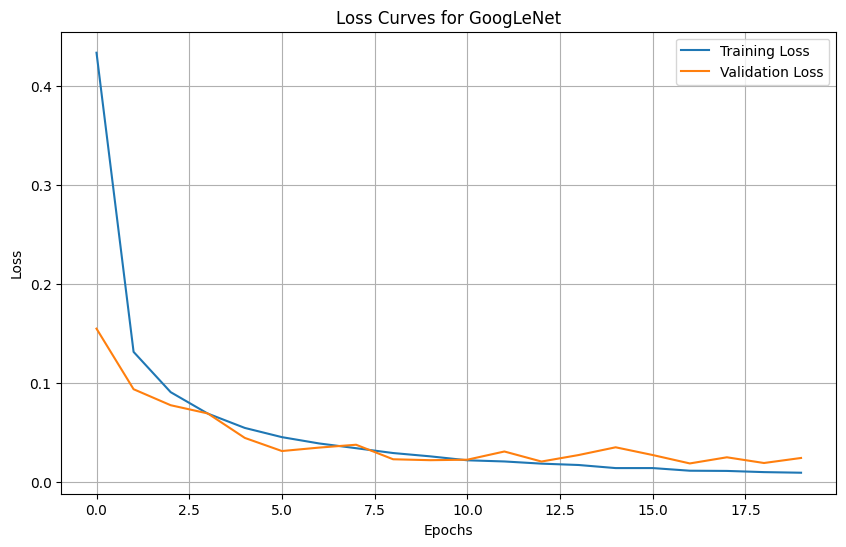

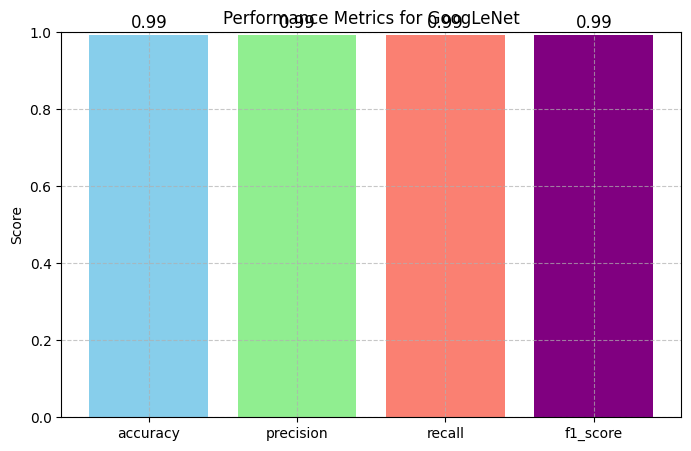

In [22]:
metrics_googlenet = evaluate_model(googlenet, x_test, y_test)
print(metrics_googlenet)
plot_loss_curves(history_googlenet, "GoogLeNet")
plot_metrics(metrics_googlenet, "GoogLeNet")

In [27]:
def build_custom_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build, compile, and train the customized VGG16 model
custom_vgg16_model = build_custom_vgg16(input_shape=(28, 28, 1), num_classes=10)
custom_vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_vgg16 = custom_vgg16_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8979 - loss: 0.3315 - val_accuracy: 0.9887 - val_loss: 0.0348
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9910 - val_loss: 0.0266
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.9929 - val_loss: 0.0237
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9920 - val_loss: 0.0254
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9916 - val_loss: 0.0265
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9941 - val_loss: 0.0221
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9976 - loss: 0.0070 - val_accuracy: 0.9919 - val_loss: 0.0276
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9978 - loss: 0.0062 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

{'accuracy': 0.9925, 'precision': 0.9925766401116249, 'recall': 0.9923723087505012, 'f1_score': 0.9924603243814654}


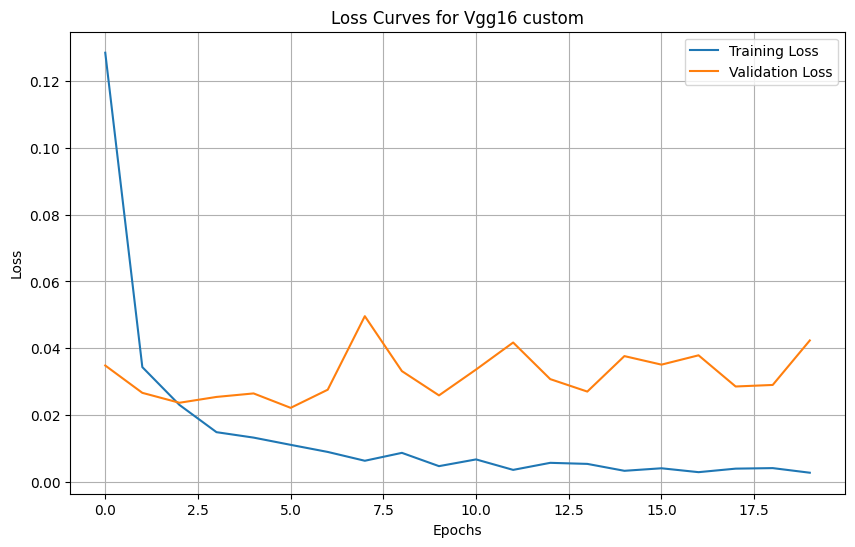

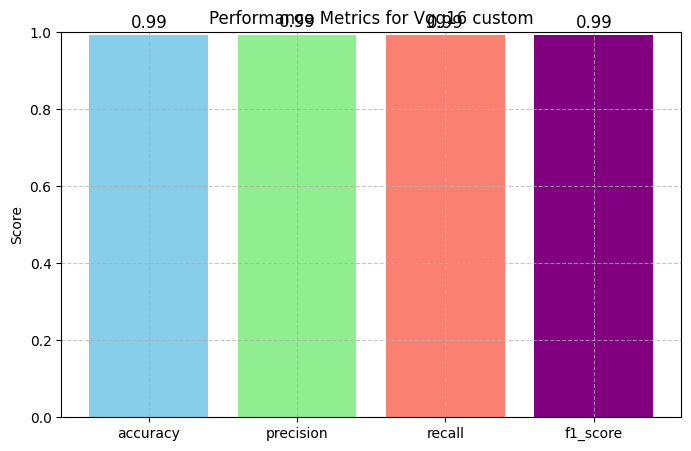

In [28]:
metrics_vgg = evaluate_model(custom_vgg16_model, x_test, y_test)
print(metrics_vgg)
plot_loss_curves(history_custom_vgg16, "Vgg16 custom")
plot_metrics(metrics_vgg, "Vgg16 custom")

In [29]:
def build_custom_xception(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.SeparableConv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Compile and train the custom Xception model
custom_xception_model = build_custom_xception(input_shape=(28, 28, 1), num_classes=10)
custom_xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_xception = custom_xception_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2737 - loss: 1.9650 - val_accuracy: 0.7347 - val_loss: 0.8690
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7554 - loss: 0.7947 - val_accuracy: 0.8473 - val_loss: 0.5172
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8607 - loss: 0.4804 - val_accuracy: 0.8957 - val_loss: 0.3487
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8959 - loss: 0.3578 - val_accuracy: 0.9047 - val_loss: 0.3252
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9105 - loss: 0.3008 - val_accuracy: 0.9256 - val_loss: 0.2537
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9223 - loss: 0.2628 - val_accuracy: 0.9356 - val_loss: 0.2218
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9303 - loss: 0.2368 - val_accuracy: 0.9374 - val_loss: 0.2143
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9345 - loss: 0.2201 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       1.00      0.98      0.99      1135
           2       0.91      0.97      0.94      1032
           3       0.99      0.94      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.96       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

{'accuracy': 0.9656, 'precision': 0.9660298113488273, 'recall': 0.9651949057706275, 'f1_score': 0.9653724429197394}


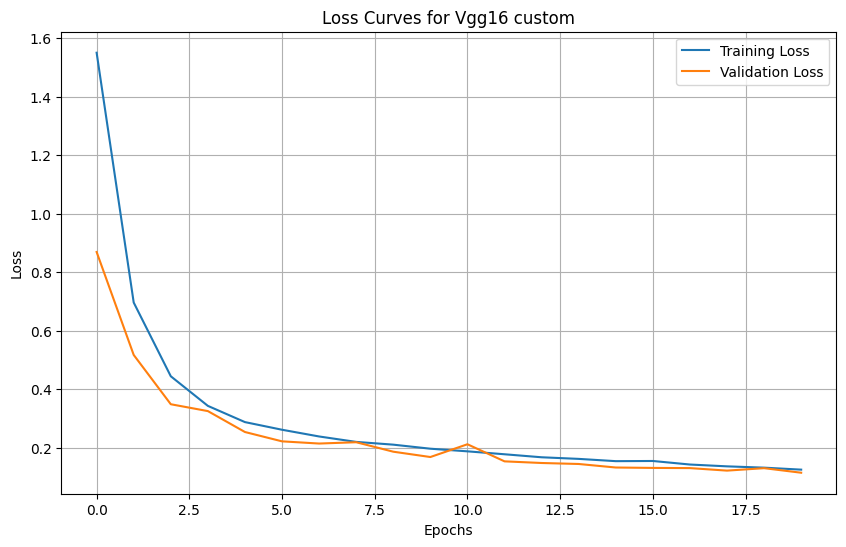

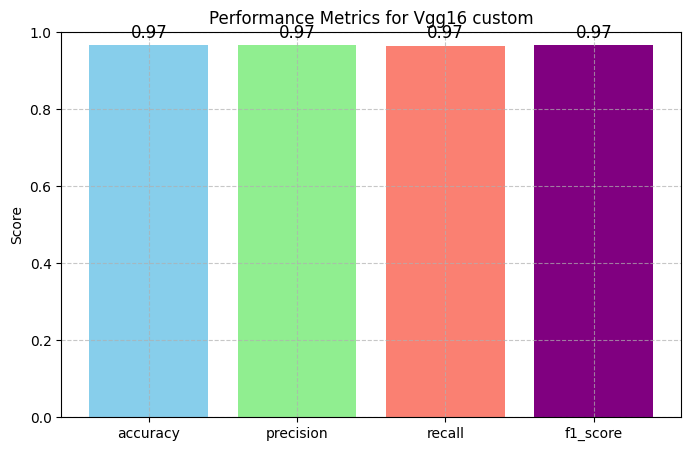

In [30]:
metrics_xception = evaluate_model(custom_xception_model, x_test, y_test)
print(metrics_xception)
plot_loss_curves(history_custom_xception, "Vgg16 custom")
plot_metrics(metrics_xception, "Vgg16 custom")

In [31]:
def build_lenet5(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [32]:
# Build and train the modified AlexNet
lenet5 = build_lenet5()
history_lenet5 = compile_and_train(lenet5, x_train, y_train, x_test, y_test, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8696 - loss: 0.4155 - val_accuracy: 0.9746 - val_loss: 0.0733
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9781 - loss: 0.0683 - val_accuracy: 0.9845 - val_loss: 0.0481
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9854 - loss: 0.0459 - val_accuracy: 0.9851 - val_loss: 0.0435
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9884 - val_loss: 0.0388
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0276 - val_accuracy: 0.9858 - val_loss: 0.0456
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9885 - val_loss: 0.0410
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9862 - val_loss: 0.0415
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9951 - loss: 0.0157 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

{'accuracy': 0.99, 'precision': 0.9898597768166862, 'recall': 0.9898756113885657, 'f1_score': 0.989856867853331}


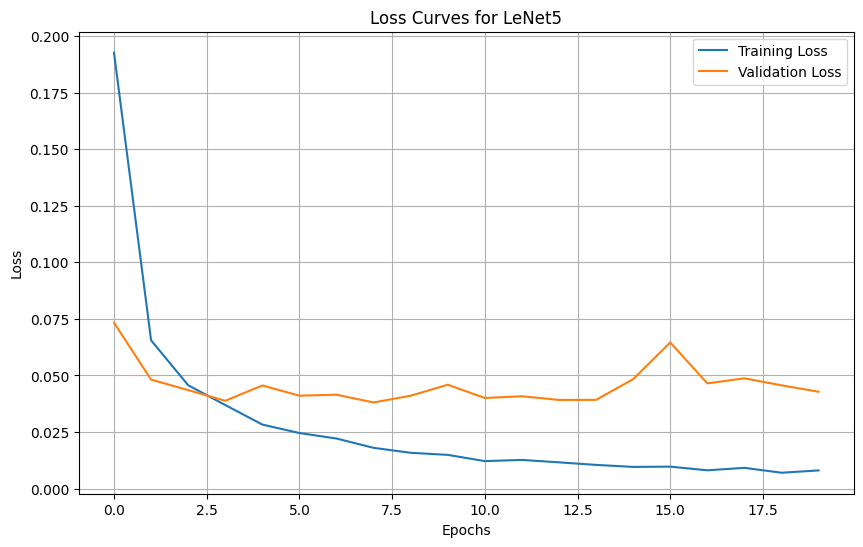

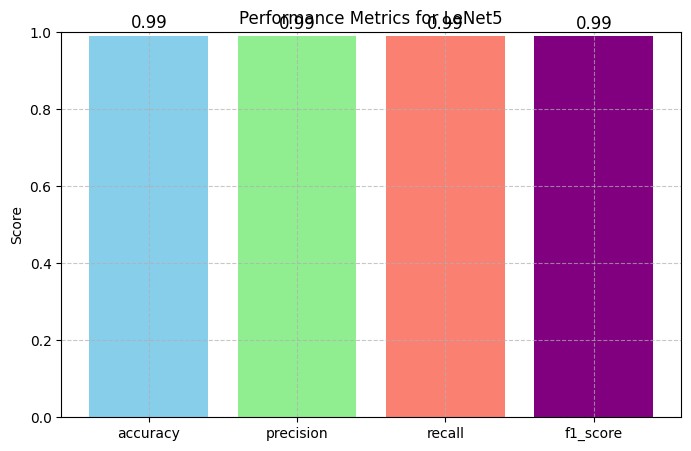

In [34]:
metrics_lenet5 = evaluate_model(lenet5, x_test, y_test)
print(metrics_lenet5)
plot_loss_curves(history_lenet5, "LeNet5")
plot_metrics(metrics_lenet5, "LeNet5")

In [35]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model

# Define a residual block
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut connection
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Build a custom ResNet model
def build_custom_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Add residual blocks
    x = residual_block(x, filters=32)
    x = residual_block(x, filters=64, stride=2)  # Downsample
    x = residual_block(x, filters=128, stride=2)  # Downsample

    # Global Average Pooling and Dense Output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Compile and train the custom ResNet model
custom_resnet_model = build_custom_resnet(input_shape=(28, 28, 1), num_classes=10)
custom_resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_resnet = custom_resnet_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8733 - loss: 0.4762 - val_accuracy: 0.3973 - val_loss: 3.0389
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9879 - loss: 0.0451 - val_accuracy: 0.9860 - val_loss: 0.0427
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9916 - loss: 0.0295 - val_accuracy: 0.9210 - val_loss: 0.2353
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9944 - loss: 0.0207 - val_accuracy: 0.9640 - val_loss: 0.1163
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9958 - loss: 0.0155 - val_accuracy: 0.9856 - val_loss: 0.0488
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9821 - val_loss: 0.0537
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9967 - loss: 0.0114 - val_accuracy: 0.9816 - val_loss: 0.0577
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9961 - loss: 0.0120 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

{'accuracy': 0.9924, 'precision': 0.9925935064212421, 'recall': 0.9922063743093512, 'f1_score': 0.992377711017262}


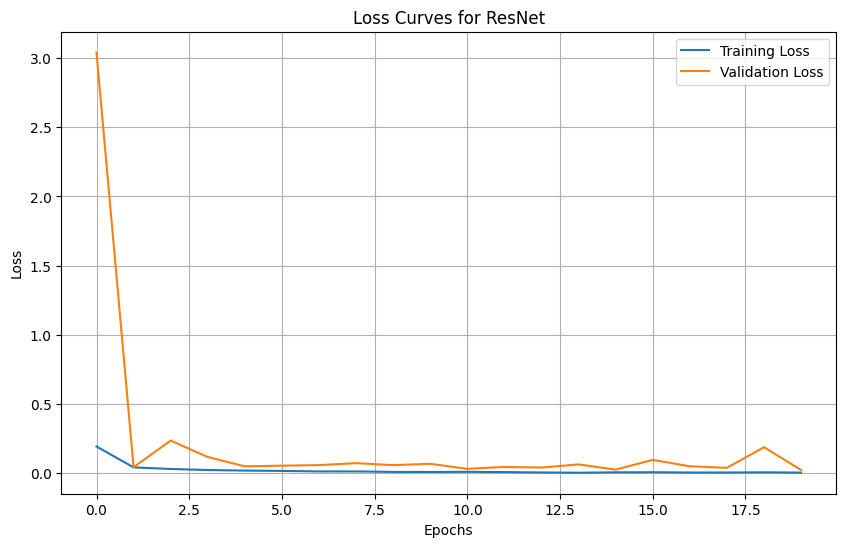

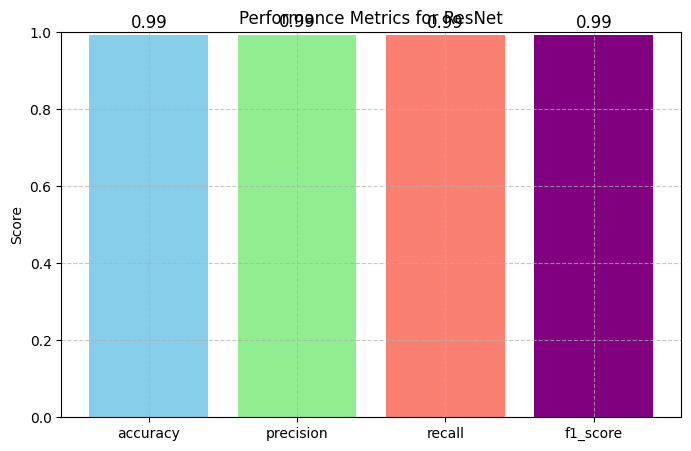

In [36]:
metrics_resnet = evaluate_model(custom_resnet_model, x_test, y_test)
print(metrics_resnet)
plot_loss_curves(history_custom_resnet, "ResNet")
plot_metrics(metrics_resnet, "ResNet")

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Multiply, Add, Input
from tensorflow.keras.models import Model

# Define the squeeze-and-excitation block
def se_block(input, reduction=16):
    channels = input.shape[-1]
    x = GlobalAveragePooling2D()(input)  # Squeeze step
    x = Dense(channels // reduction, activation='relu')(x)  # Dense layer for excitation
    x = Dense(channels, activation='sigmoid')(x)  # Rescale the features

    x = Multiply()([input, x])  # Scale the original input by the learned weights
    return x

# Build a custom SENet model
def build_custom_senet(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Add Squeeze-and-Excitation blocks
    x = se_block(x, reduction=16)

    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = se_block(x, reduction=8)

    # Global Average Pooling and Dense Output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Compile and train the custom SENet model
custom_senet_model = build_custom_senet(input_shape=(28, 28, 1), num_classes=10)
custom_senet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_senet = custom_senet_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.3808 - loss: 1.8286 - val_accuracy: 0.1911 - val_loss: 4.3051
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6877 - loss: 1.0283 - val_accuracy: 0.0980 - val_loss: 12.8076
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7746 - loss: 0.7818 - val_accuracy: 0.0974 - val_loss: 24.5437
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8190 - loss: 0.6160 - val_accuracy: 0.1178 - val_loss: 4.2636
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8562 - loss: 0.5008 - val_accuracy: 0.1620 - val_loss: 5.9286
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8717 - loss: 0.4401 - val_accuracy: 0.0975 - val_loss: 15.4729
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8876 - loss: 0.3819 - val_accuracy: 0.1976 - val_loss: 11.1551
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9003 - loss: 0.3442 - val_accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.01      0.01      1032
           3       0.12      1.00      0.22      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       1.00      0.03      0.07       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.03     10000
weighted avg       0.11      0.10      0.03     10000

{'accuracy': 0.105, 'precision': 0.11267894890527266, 'recall': 0.10406638492271938, 'f1_score': 0.028927743704188425}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

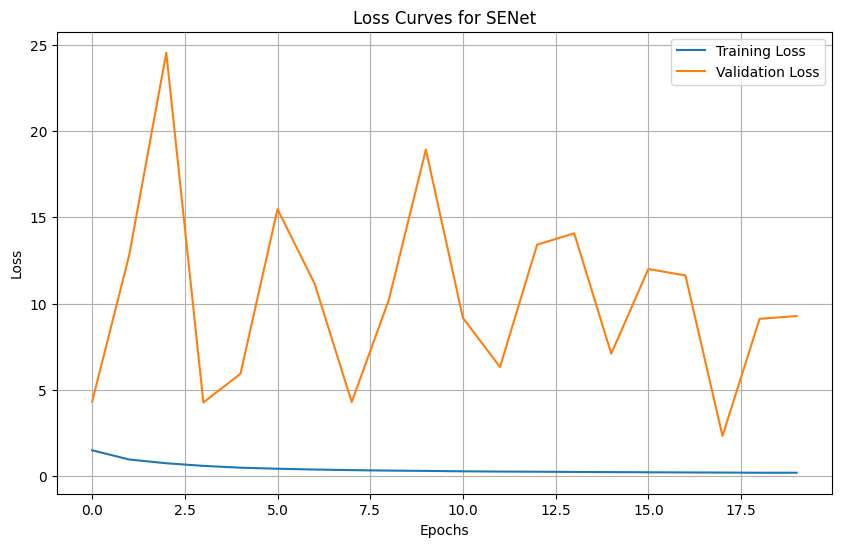

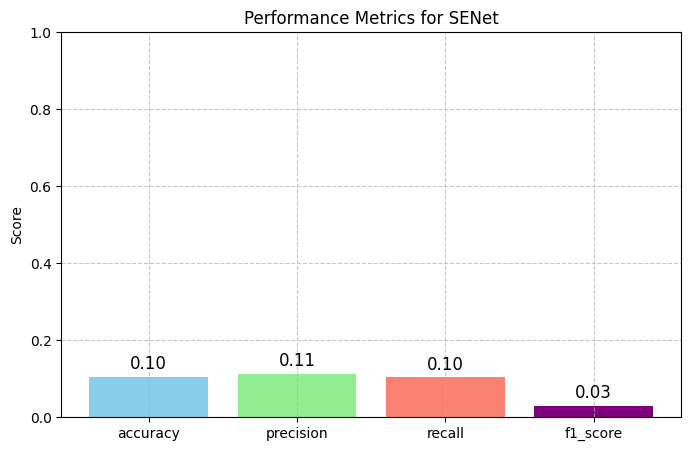

In [38]:
metrics_senet = evaluate_model(custom_senet_model, x_test, y_test)
print(metrics_senet)
plot_loss_curves(history_custom_senet, "SENet")
plot_metrics(metrics_senet, "SENet")

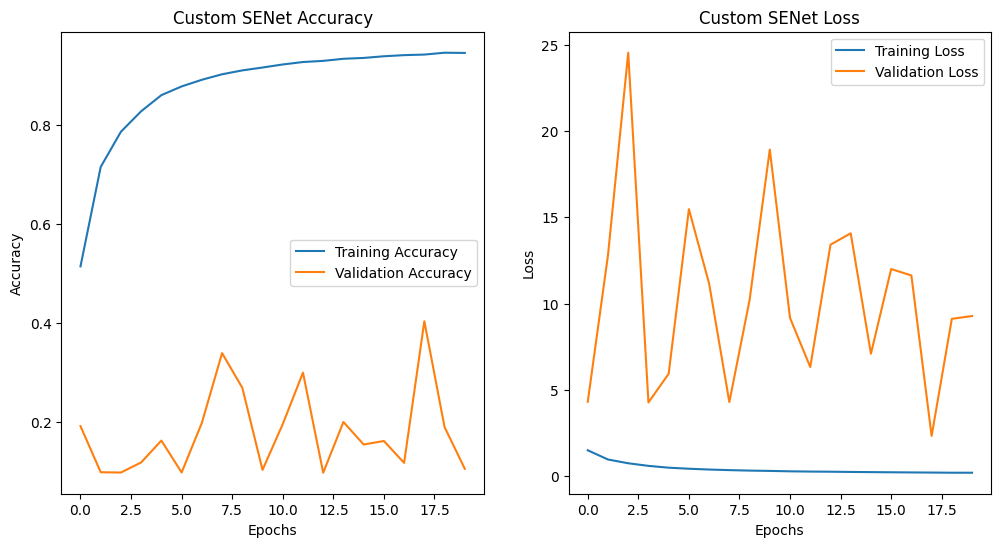

In [39]:
import matplotlib.pyplot as plt

def plot_metrics(history, model_name='Model'):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the performance metrics for Custom SENet
plot_metrics(history_custom_senet, model_name='Custom SENet')


In [40]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and calculate metrics
y_pred = custom_senet_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.01      0.01      1032
           3       0.12      1.00      0.22      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       1.00      0.03      0.07       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.03     10000
weighted avg       0.11      0.10      0.03     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
